In [41]:
# necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, f1_score, accuracy_score, roc_curve,
    confusion_matrix, ConfusionMatrixDisplay
)
import os
from google.colab import files
import shutil

In [4]:
uploaded = files.upload()

Saving test_multioff_preds_bert_20_epochs.npy to test_multioff_preds_bert_20_epochs.npy
Saving test_multioff_preds_bert_30_epochs.npy to test_multioff_preds_bert_30_epochs.npy
Saving test_multioff_preds_roberta_3_epochs.npy to test_multioff_preds_roberta_3_epochs.npy
Saving test_multioff_preds_roberta_20_epochs.npy to test_multioff_preds_roberta_20_epochs.npy
Saving test_multioff_preds_roberta_30_epochs.npy to test_multioff_preds_roberta_30_epochs.npy
Saving test_multioff_probs_bert_20_epochs.npy to test_multioff_probs_bert_20_epochs.npy
Saving test_multioff_probs_bert_30_epochs.npy to test_multioff_probs_bert_30_epochs.npy
Saving test_multioff_probs_roberta_3_epochs.npy to test_multioff_probs_roberta_3_epochs.npy
Saving test_multioff_probs_roberta_20_epochs.npy to test_multioff_probs_roberta_20_epochs.npy
Saving test_multioff_probs_roberta_30_epochs.npy to test_multioff_probs_roberta_30_epochs.npy
Saving train_multioff_preds_bert_20_epochs.npy to train_multioff_preds_bert_20_epochs.np

In [43]:
output_dir = "/content/outputs"
os.makedirs(output_dir, exist_ok=True)


for filename in uploaded.keys():
    if filename.endswith(".npy"):
        shutil.move(filename, os.path.join(output_dir, filename))
    elif filename.endswith(".zip"):
        !unzip {filename} -d {output_dir}

print(f"Files moved to {output_dir}")
print("Contents of outputs:", os.listdir(output_dir))

Files moved to /content/outputs
Contents of outputs: ['test_multioff_preds_bert_30_epochs.npy', 'test_multioff_probs_bert_30_epochs.npy', 'y_preds_xlmr_sota.npy', 'train_multioff_preds_roberta_3_epochs.npy', 'y_probs_xlmr_10_epochs.npy', 'y_true_xlmr_sota_2_epochs.npy', 'y_probs_xlmr_sota_5_epochs.npy', 'y_probs_bert_roberta.npy', 'y_preds_xlmr_sota_5_epochs.npy', 'y_preds_xlmr_sota_20_epochs.npy', 'y_probs_roberta_3_epochs.npy', 'val_multioff_probs_roberta_3_epochs.npy', 'y_probs_bert_20_epochs.npy', 'val_multioff_probs_roberta_20_epochs.npy', 'test_multioff_probs_roberta_3_epochs.npy', 'test_multioff_probs_roberta_30_epochs.npy', 'val_multioff_probs_bert_20_epochs.npy', 'test_multioff_preds_bert_20_epochs.npy', 'y_preds_bert_roberta.npy', 'train_multioff_probs_roberta_30_epochs.npy', 'y_probs_xlmr_sota_10_epochs.npy', 'y_probs_roberta_30_epochs.npy', 'val_multioff_probs_roberta_30_epochs.npy', 'train_multioff_probs_bert_20_epochs.npy', 'val_multioff_preds_roberta_3_epochs.npy', 'val_

In [44]:
# Load labels and model probabilities
y_true = np.load(os.path.join(output_dir, "y_true_clip.npy"))  # Ground truth

In [45]:
# Load model outputs (one representative run per model)
y_probs_clip = np.load(os.path.join(output_dir, "y_probs_clip.npy"))
y_probs_bert = np.load(os.path.join(output_dir, "y_probs_bert_30_epochs.npy"))
y_probs_roberta = np.load(os.path.join(output_dir, "y_probs_roberta_30_epochs.npy"))
y_probs_xlmr = np.load(os.path.join(output_dir, "y_probs_xlmr_20_epochs.npy"))
y_probs_xlmr_sota = np.load(os.path.join(output_dir, "y_probs_xlmr_sota_20_epochs.npy"))

In [46]:
# Evaluation function
def evaluate_model(y_true, y_probs, model_name):
    preds = (y_probs >= 0.5).astype(int)
    auc = roc_auc_score(y_true, y_probs)
    f1 = f1_score(y_true, preds)
    acc = accuracy_score(y_true, preds)
    cm = confusion_matrix(y_true, preds)

    print(f"{model_name} Results:")
    print(f"  AUC-ROC: {auc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Accuracy: {acc:.4f}")
    print()

    return auc, f1, acc, cm

In [47]:
# Evaluate each model (slice y_true to match predictions)
clip_results = evaluate_model(y_true, y_probs_clip, "CLIP")
bert_results = evaluate_model(y_true[:len(y_probs_bert)], y_probs_bert, "BERT (30 Epochs)")
roberta_results = evaluate_model(y_true[:len(y_probs_roberta)], y_probs_roberta, "RoBERTa (30 Epochs)")
xlmr_results = evaluate_model(y_true[:len(y_probs_xlmr)], y_probs_xlmr, "XLM-R (20 Epochs)")
xlmr_sota_results = evaluate_model(y_true[:len(y_probs_xlmr_sota)], y_probs_xlmr_sota, "XLM-R SOTA (20 Epochs)")

CLIP Results:
  AUC-ROC: 0.7339
  F1 Score: 0.2634
  Accuracy: 0.6776

BERT (30 Epochs) Results:
  AUC-ROC: 0.4999
  F1 Score: 0.2771
  Accuracy: 0.5930

RoBERTa (30 Epochs) Results:
  AUC-ROC: 0.4686
  F1 Score: 0.3010
  Accuracy: 0.5680

XLM-R (20 Epochs) Results:
  AUC-ROC: 0.4859
  F1 Score: 0.3799
  Accuracy: 0.4940

XLM-R SOTA (20 Epochs) Results:
  AUC-ROC: 0.4957
  F1 Score: 0.2906
  Accuracy: 0.5850



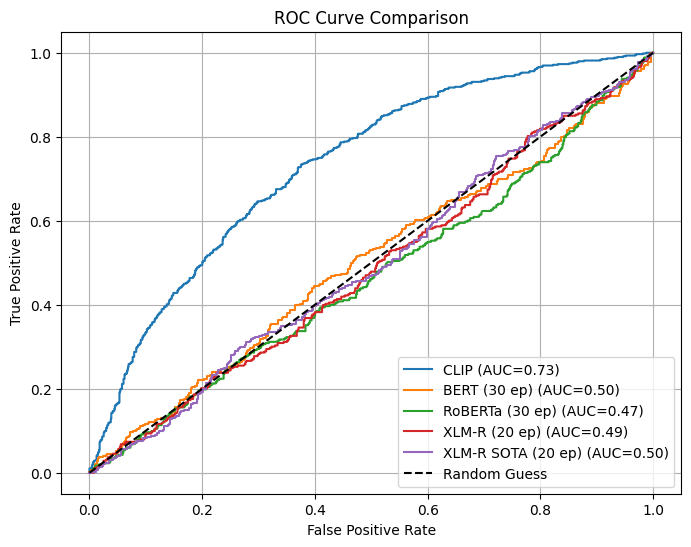

In [48]:
# Plot ROC curves
fpr_clip, tpr_clip, _ = roc_curve(y_true, y_probs_clip)
fpr_bert, tpr_bert, _ = roc_curve(y_true[:len(y_probs_bert)], y_probs_bert)
fpr_roberta, tpr_roberta, _ = roc_curve(y_true[:len(y_probs_roberta)], y_probs_roberta)
fpr_xlmr, tpr_xlmr, _ = roc_curve(y_true[:len(y_probs_xlmr)], y_probs_xlmr)
fpr_xlmr_sota, tpr_xlmr_sota, _ = roc_curve(y_true[:len(y_probs_xlmr_sota)], y_probs_xlmr_sota)

plt.figure(figsize=(8,6))
plt.plot(fpr_clip, tpr_clip, label=f"CLIP (AUC={clip_results[0]:.2f})")
plt.plot(fpr_bert, tpr_bert, label=f"BERT (30 ep) (AUC={bert_results[0]:.2f})")
plt.plot(fpr_roberta, tpr_roberta, label=f"RoBERTa (30 ep) (AUC={roberta_results[0]:.2f})")
plt.plot(fpr_xlmr, tpr_xlmr, label=f"XLM-R (20 ep) (AUC={xlmr_results[0]:.2f})")
plt.plot(fpr_xlmr_sota, tpr_xlmr_sota, label=f"XLM-R SOTA (20 ep) (AUC={xlmr_sota_results[0]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(output_dir, "roc_comparison_selected_models.png"))
plt.show()

Text(0.5, 1.05, 'Confusion Matrices')

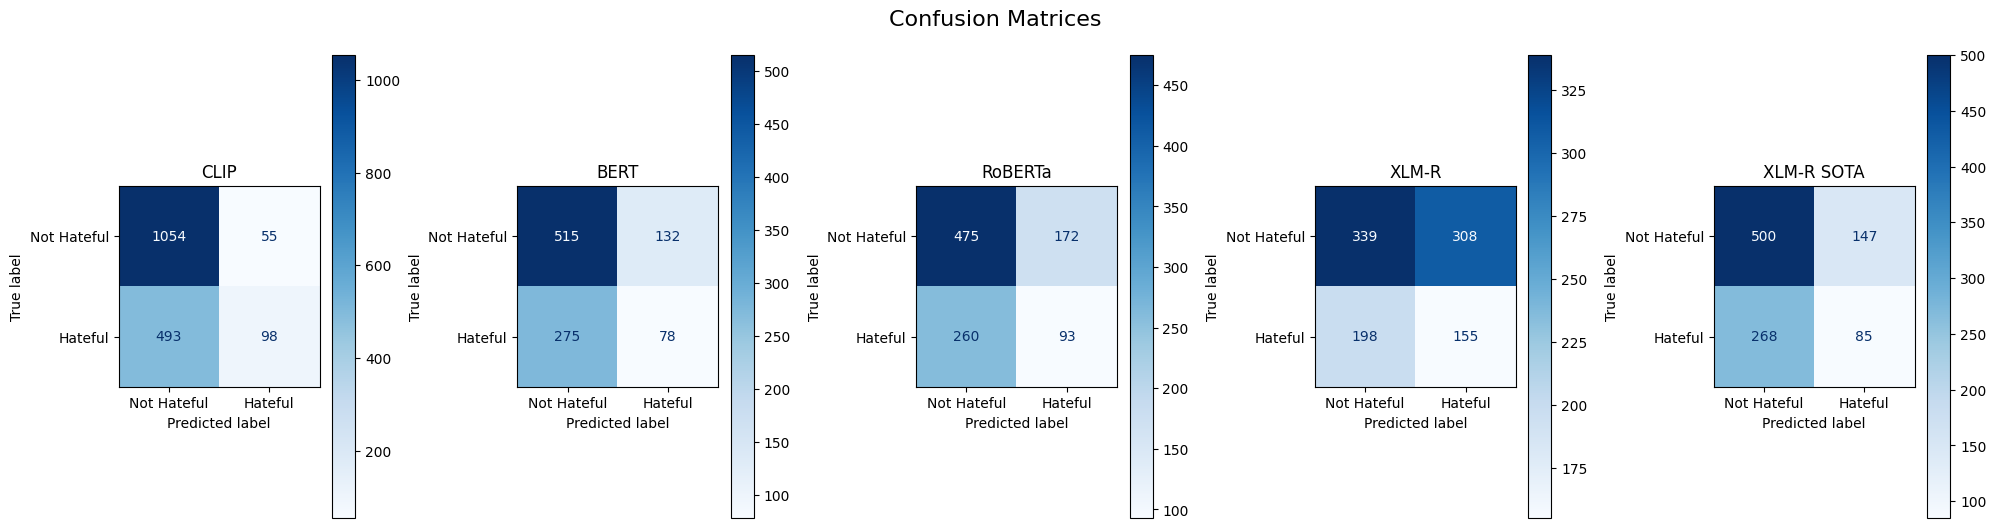

In [49]:
# Plot confusion matrices
fig, axs = plt.subplots(1, 5, figsize=(20,5))
ConfusionMatrixDisplay(clip_results[3], display_labels=["Not Hateful", "Hateful"]).plot(ax=axs[0], cmap=plt.cm.Blues, values_format='d')
axs[0].set_title("CLIP")
ConfusionMatrixDisplay(bert_results[3], display_labels=["Not Hateful", "Hateful"]).plot(ax=axs[1], cmap=plt.cm.Blues, values_format='d')
axs[1].set_title("BERT")
ConfusionMatrixDisplay(roberta_results[3], display_labels=["Not Hateful", "Hateful"]).plot(ax=axs[2], cmap=plt.cm.Blues, values_format='d')
axs[2].set_title("RoBERTa")
ConfusionMatrixDisplay(xlmr_results[3], display_labels=["Not Hateful", "Hateful"]).plot(ax=axs[3], cmap=plt.cm.Blues, values_format='d')
axs[3].set_title("XLM-R")
ConfusionMatrixDisplay(xlmr_sota_results[3], display_labels=["Not Hateful", "Hateful"]).plot(ax=axs[4], cmap=plt.cm.Blues, values_format='d')
axs[4].set_title("XLM-R SOTA")

plt.tight_layout()
plt.suptitle("Confusion Matrices", fontsize=16, y=1.05)
#plt.savefig(os.path.join(output_dir, "confusion_matrices_selected_models.png"))
#plt.show()

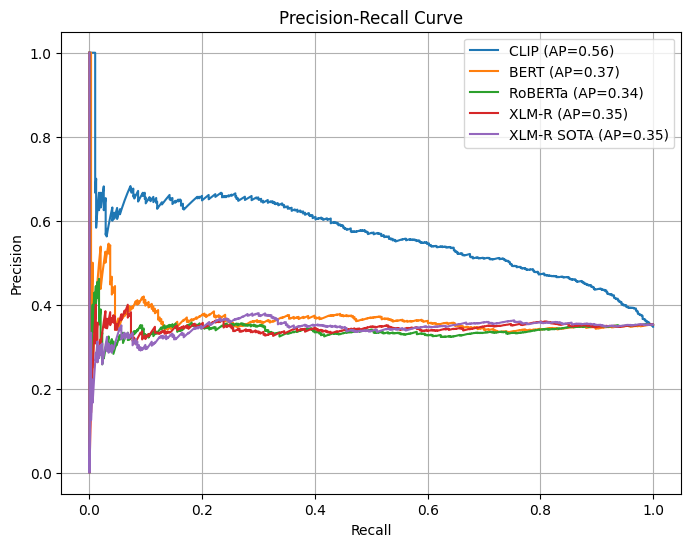

In [50]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_pr_curve(y_true, y_probs, label="Model"):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    ap = average_precision_score(y_true, y_probs)

    plt.plot(recall, precision, label=f"{label} (AP={ap:.2f})")
    return ap

plt.figure(figsize=(8,6))
ap_clip = plot_pr_curve(y_true, y_probs_clip, "CLIP")
ap_bert = plot_pr_curve(y_true[:len(y_probs_bert)], y_probs_bert, "BERT")
ap_roberta = plot_pr_curve(y_true[:len(y_probs_roberta)], y_probs_roberta, "RoBERTa")
ap_xlmr = plot_pr_curve(y_true[:len(y_probs_xlmr)], y_probs_xlmr, "XLM-R")
ap_xlmr_sota = plot_pr_curve(y_true[:len(y_probs_xlmr_sota)], y_probs_xlmr_sota, "XLM-R SOTA")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

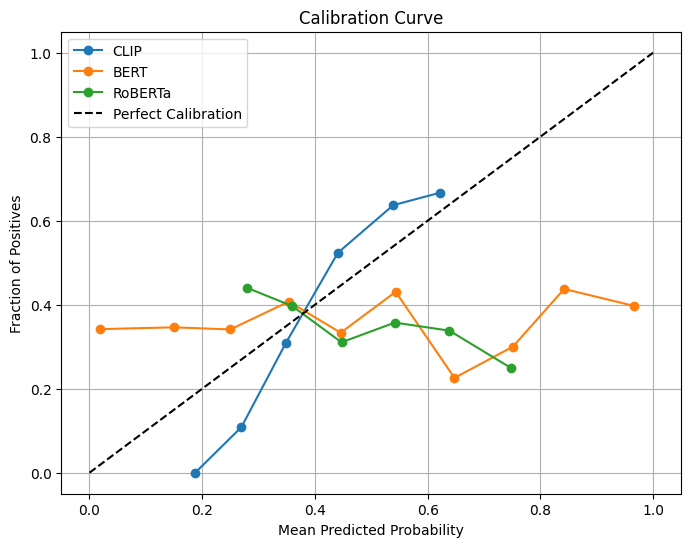

In [51]:
from sklearn.calibration import calibration_curve

def plot_calibration(y_true, y_probs, label):
    prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=label)

plt.figure(figsize=(8,6))
plot_calibration(y_true, y_probs_clip, "CLIP")
plot_calibration(y_true[:len(y_probs_bert)], y_probs_bert, "BERT")
plot_calibration(y_true[:len(y_probs_roberta)], y_probs_roberta, "RoBERTa")
plt.plot([0, 1], [0, 1], 'k--', label="Perfect Calibration")

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend()
plt.grid()
plt.show()


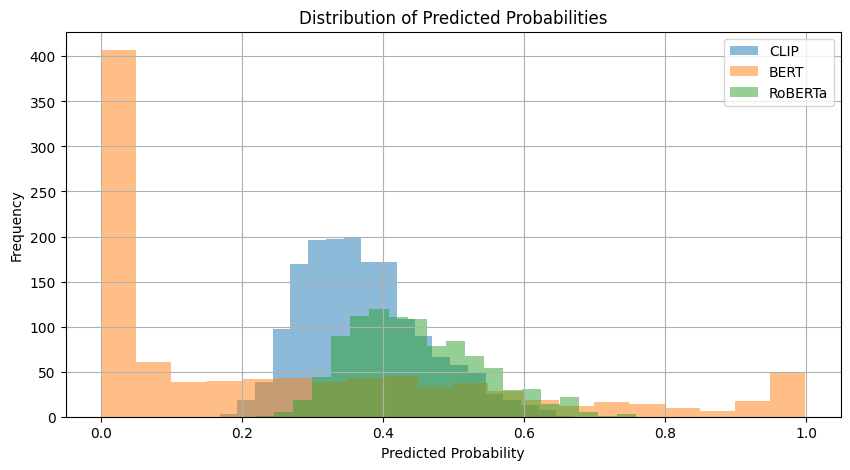

In [52]:
plt.figure(figsize=(10,5))
plt.hist(y_probs_clip, bins=20, alpha=0.5, label="CLIP")
plt.hist(y_probs_bert, bins=20, alpha=0.5, label="BERT")
plt.hist(y_probs_roberta, bins=20, alpha=0.5, label="RoBERTa")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.legend()
plt.grid()
plt.show()
